In [142]:
import sklearn 
from sklearn.datasets import load_diabetes
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

import time



In [143]:
x,y = sklearn.datasets.load_diabetes( return_X_y=True)

In [144]:
print (x.shape)
print(y.shape)

(442, 10)
(442,)


In [145]:
x_train , x_test, y_train , y_test = train_test_split(x, y , test_size=0.2,  random_state = 2)

In [146]:
x_train.shape

(353, 10)

In [147]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [148]:
print(reg.coef_)

[  -9.15865318 -205.45432163  516.69374454  340.61999905 -895.5520019
  561.22067904  153.89310954  126.73139688  861.12700152   52.42112238]


In [149]:
print(reg.intercept_)

151.88331005254167


In [150]:
x_train.shape


(353, 10)

In [151]:
y_pred = reg.predict(x_test)

In [152]:
r2_score(y_test, y_pred)

0.4399338661568968

In [153]:
# here we are calcualating the updation for single value not for matrix 

In [154]:
class SGDRegressor:
    
    def __init__(self, learning_rate=0.1 ,epochs=100):
        self.epochs = epochs
        self.lr = learning_rate
        self.coef_ = None
        self.intercept_ = None
        
   
    def fit(self, x_train, y_train):
        # init your coefs
        
        self.intercept_ = 0
        self.coef_ = np.ones(x_train.shape[1])
       
        
        for i in range(self.epochs) :
            for j in range(x_train.shape[0]):
                idx = np.random.randint(0, x_train.shape[0])
                y_hat = np.dot(x_train[idx], self.coef_) + self.intercept_    # only for idx single value
                
                
                # for calculating the updated value of the intercept 
                intercept_der = -2 * (y_train[idx] - y_hat)
                self.intercept_ = self.intercept_ - (self.lr* intercept_der)
                
                # for calculating the updated value of the coeff
                coef_der = -2 *np.dot((y_train[idx] - y_hat),x_train[idx])
                self.coef_ = self.coef_ - (self.lr *coef_der)
                 
            
                
                
        print(self.intercept_ , self.coef_)     
    def predict(self,x_test):
        return np.dot(x_test , self.coef_)+ self.intercept_
        
        

In [155]:
np.random.randint(0, x_train.shape[0]) # generating the random number from the data from 0 to 353

96

In [156]:
x_train[42]

array([ 0.0562386 , -0.04464164, -0.05794093, -0.00797713,  0.0520932 ,
        0.04910302,  0.05600338, -0.02141183, -0.02832317,  0.04448548])

In [157]:
 coef_ = np.ones(x_train.shape[1])
       

In [158]:
coef_

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [159]:
intercept_ = 0

In [160]:
np.dot(x_train[42], coef_) + intercept_

0.09762897536168798

In [161]:
sgd = SGDRegressor(epochs=50, learning_rate= 0.01)
start = time.time() # calcualting the time for the sgd regressor
sgd.fit(x_train, y_train)
print("time taken is ", time.time( )- start)




157.4509878774975 [  46.04411824  -65.53500765  362.19205706  248.06802127   14.93798241
  -29.00609789 -175.92710511  130.05351909  319.02427709  133.22525808]
time taken is  0.8482580184936523


In [162]:
y_pred = sgd.predict(x_test)

In [163]:
r2_score(y_test, y_pred)

0.4312274906578232

In [164]:
# VISUALISATION 

In [165]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)
plt.scatter(X,y)

In [166]:
lr = LinearRegression()
lr.fit(X,y)
print(lr.coef_)
print(lr.intercept_)

[27.82809103]
-2.29474455867698


In [167]:
import time

b = 150
m = -127.82
all_b = []
all_m = []
all_cost = []
all_lr = []


epochs = 1

start = time.time()

t0,t1 = 5,50
def learning_rate(t):
    return t0/(t + t1)

for i in range(epochs):
    for j in range(X.shape[0]):
        
        lr = learning_rate(i * X.shape[0] + j)
        
        idx = np.random.randint(X.shape[0], size=1)
        
        slope_b = -2 * (y[idx] - (m * X[idx]) -  b)
        slope_m = -2 * (y[idx] - (m * X[idx]) -  b) * X[idx]
        cost = (y[idx] - m * X[idx] -b) ** 2
        
        
        b = b - (lr * slope_b)
        m = m - (lr * slope_m)
        all_b.append(b)
        all_m.append(m)
        all_cost.append(cost)
        all_lr.append(lr)
print("Total time taken",time.time() - start)


Total time taken 0.03313565254211426


In [168]:
len(all_cost)

100

<IPython.core.display.Javascript object>


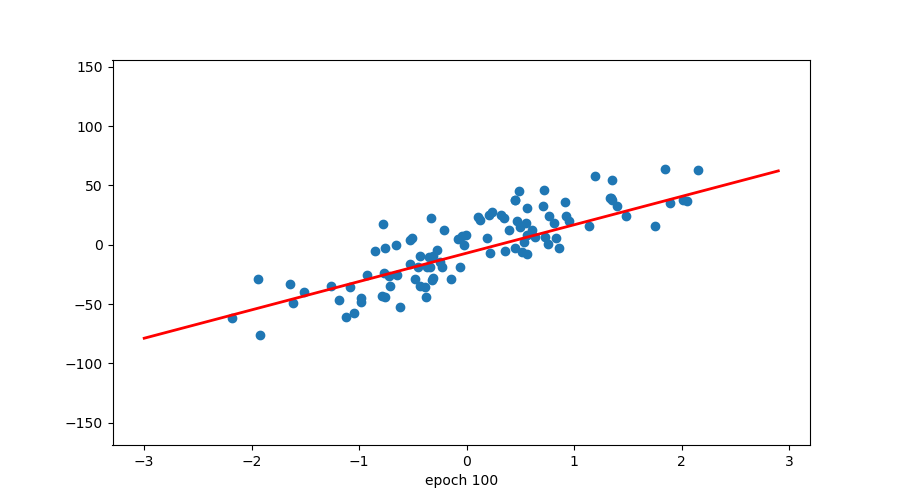

In [169]:
fig, ax = plt.subplots(figsize=(9,5))
#fig.set_tight_layout(True)

x_i = np.arange(-3, 3, 0.1)
y_i = x_i*(-27) -150
ax.scatter(X, y)
line, = ax.plot(x_i, x_i*50 - 4, 'r-', linewidth=2)

def update(i):
    label = 'epoch {0}'.format(i + 1)
    line.set_ydata(x_i*all_m[i] + all_b[i])
    ax.set_xlabel(label)
    # return line, ax

anim = FuncAnimation(fig, update, frames=100, interval=5)

f = r"stochastic_animation_line_plot.gif" 
writergif = animation.PillowWriter(fps=2) 
anim.save(f, writer=writergif)


In [170]:
# this above fig show that the model not always move in correct direction , model is not confident about th 
# e movment this is obious as you can see it just depent on the single value for the updation of the value

In [171]:
m_arr = np.linspace(-150, 150, 10)
b_arr = np.linspace(-150, 150, 10)
mGrid, bGrid = np.meshgrid(m_arr,b_arr)

final = np.vstack((mGrid.ravel().reshape(1,100),bGrid.ravel().reshape(1,100))).T

z_arr = []

for i in range(final.shape[0]):
    z_arr.append(np.sum((y - final[i,0]*X.reshape(100) - final[i,1])**2))

z_arr = np.array(z_arr).reshape(10,10)
 




<IPython.core.display.Javascript object>


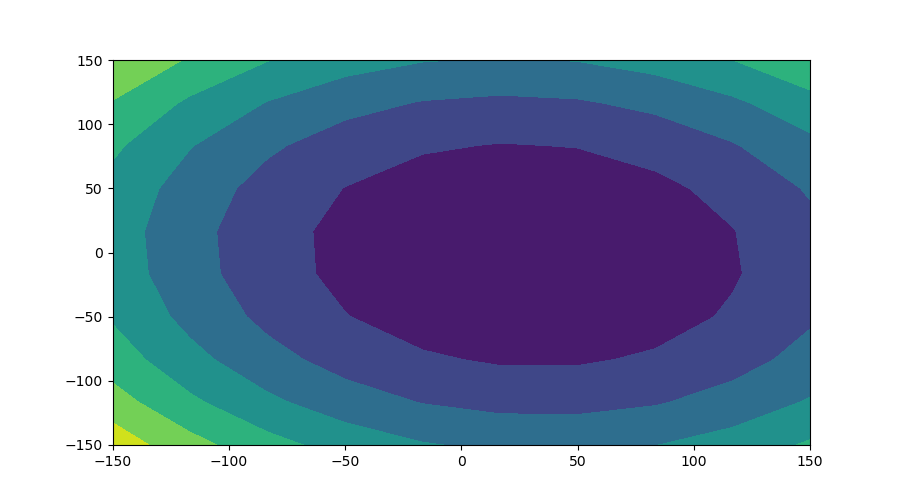

In [172]:
%matplotlib notebook
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

# intercept graph
num_epochs = list(range(0,30))
fig = plt.figure(figsize=(9,5)) 
axis = plt.axes(xlim =(-150, 150), ylim =(-150, 150)) 

axis.contourf(m_arr, b_arr, z_arr)

line, = axis.plot([], [], lw = 2,color='white') 
  
xdata, ydata = [], [] 
  
# animation function 
def animate(i): 
    label = 'epoch {0}'.format(i + 1)
    xdata.append(all_m[i]) 
    ydata.append(all_b[i]) 
    line.set_data(xdata, ydata) 
    axis.set_xlabel(label)
      
    return line, 
  
# calling the animation function     
anim = animation.FuncAnimation(fig, animate, frames = 100,repeat=False, interval = 100)

#f = r"stochastic_animation_contour_plot.gif" 
#writergif = animation.PillowWriter(fps=2) 
#anim.save(f, writer=writergif)

In [173]:
# similarliy youu can see here this is so much of random value to predict the values

In [174]:
all_b[-1]

array([[-7.0408764]])

In [175]:
all_m[-1]

array([[23.90470217]])

<IPython.core.display.Javascript object>


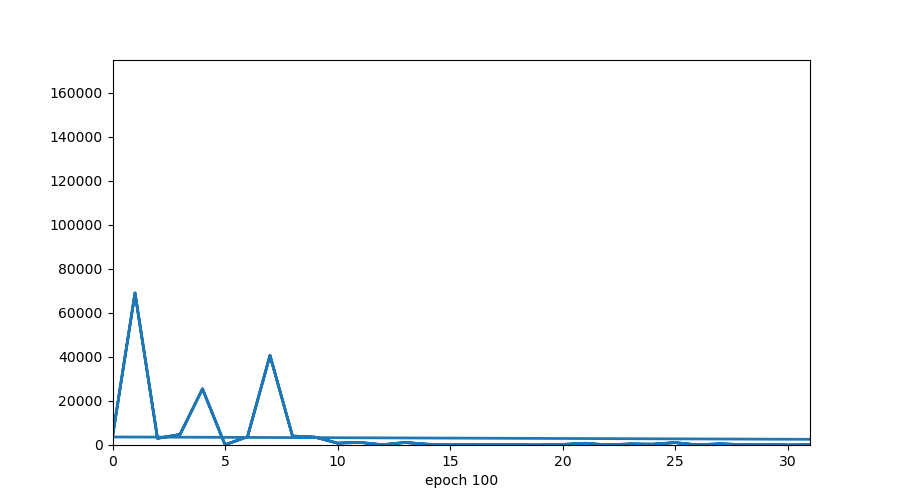

C:\anaconda\lib\site-packages\matplotlib\animation.py:880: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


In [176]:
num_epochs = list(range(0,100))
fig = plt.figure(figsize=(9,5)) 
axis = plt.axes(xlim =(0, 31), ylim =(0, 175000)) 
  
line, = axis.plot([], [], lw = 2) 
  
xdata, ydata = [], [] 
  
# animation function 
def animate(i): 
    label = 'epoch {0}'.format(i + 1)
    xdata.append(num_epochs[i]) 
    ydata.append(all_cost[i]) 
    line.set_data(xdata, ydata) 
    axis.set_xlabel(label)
      
    return line, 
  
# calling the animation function     
anim = animation.FuncAnimation(fig, animate, frames = 100,repeat=False, interval = 150)

f = r"stochastic_animation_cost_plot.gif" 
writergif = animation.PillowWriter(fps=2) 
anim.save(f, writer=writergif)

In [177]:
# we vari  learning rate by reducing the value so that we reduce the fluctuation

In [178]:

# code for fluctuating the learning rate 
t0 , t1 = 5,50 
def learning_rate(t):
    return t0/(t + t1)

for i in range(epochs):
    for j in range(x_shape[0]):
        lr = learning_rate(i*x.shape[0]+j )


NameError: name 'x_shape' is not defined

In [179]:
# sgdregressor in sklearn 

In [180]:
from sklearn.linear_model import SGDRegressor

In [187]:
reg = SDRegressor(max_iter=10,  learning_rate='constant', eta0=0.01)

TypeError: SDRegressor.__init__() got an unexpected keyword argument 'max_iter'

In [188]:
reg.fit(x_train, y_train)

LinearRegression()

In [189]:
y_pred = reg.predict(x_test)

In [190]:
r2_score(y_test, y_pred)

0.4399338661568968